<a href="https://colab.research.google.com/github/lagonee23/game-analysis/blob/main/game_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üïπÔ∏è Data Description

- Rank : Ï†ÑÏ≤¥ Îß§Ï∂ú ÏàúÏúÑ
- Name : Í≤åÏûÑ Ïù¥Î¶Ñ
- Platform : Í≤åÏûÑ Ï∂úÏãú ÌîåÎû´Ìèº (Ïòà: PC, PS4 Îì±)
- Year : Í≤åÏûÑÏù¥ Ï∂úÏãúÎêú Ïó∞ÎèÑ
- Genre : Í≤åÏûÑ Ïû•Î•¥
- Publisher : Í≤åÏûÑ Ï†úÏûë ÌöåÏÇ¨
- NA_Sales : Î∂ÅÎØ∏ ÏßÄÏó≠ Îß§Ï∂ú(Î∞±Îßå Îã®ÏúÑ)
- EU_Sales : Ïú†ÎüΩ ÏßÄÏó≠ Îß§Ï∂ú(Î∞±Îßå Îã®ÏúÑ)
- JP_Sales : ÏùºÎ≥∏ ÎÇ¥ Îß§Ï∂ú(Î∞±Îßå Îã®ÏúÑ)
- Other_Sales : Í∏∞ÌÉÄ ÏßÄÏó≠Ïùò Îß§Ï∂ú(Î∞±Îßå Îã®ÏúÑ)
- Global_Sales : Ï†Ñ ÏÑ∏Í≥Ñ Ï¥ù Îß§Ï∂úÏï°

# Îç∞Ïù¥ÌÑ∞ Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
# ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lagonee23/game-analysis/main/data/vgsales.csv'

# GitHubÏùò CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df_origin = pd.read_csv(url)
df_origin.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# EDA
1. ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞
2. Í≤∞Ï∏°Ïπò Ï†úÍ±∞
3. `Year`Ïùò ÏûêÎ£åÌòïÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
4. `Year`Ïùò Ïù¥ÏÉÅÏπò Î≥ÄÍ≤Ω
5. `Sales` Ïó¥Ïùò Î¨∏ÏûêÎ•º Ï†úÍ±∞ÌïòÍ≥† `flaoat` ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôò
6. `Total` Ïª¨ÎüºÏùÑ Ï∂îÍ∞Ä
7. Îç∞Ïù¥ÌÑ∞Ïùò final versionÏùÑ Ï†ÄÏû•

### ÌïÑÏöî ÏóÜÎäî Ïó¥ Ï†úÍ±∞

In [ ]:
df = df_origin.copy() # ÏõêÎ≥∏ Î≥µÏÇ¨

df.drop('Unnamed: 0', axis=1, inplace=True)

# Ïª¨Îüº ÏàúÏÑú Î≥ÄÍ≤Ω
df = df[['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df.columns

Index(['Year', 'Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

### Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Year           0
Name           0
Platform       0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

### `Year`Ïùò ÏûêÎ£åÌòïÏùÑ Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò

In [ ]:
df['Year'] = df['Year'].astype(int)
df['Year'].dtype

dtype('int64')

In [ ]:
# Ïó∞ÎèÑÏàúÏúºÎ°ú Ï†ïÎ†¨
df.sort_values('Year', inplace=True)
df['Year'].unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

### `Year`Ïùò Ïù¥ÏÉÅÏπò Î≥ÄÍ≤Ω
- 0~20Ïù∏ Í≤ΩÏö∞ 2,000ÏùÑ ÎçîÌïúÎã§.
- 21Ïù¥ÏÉÅ 100Î∞ëÏúºÎ°úÎäî 1,900ÏùÑ ÎçîÌïúÎã§.

In [ ]:
# Ïó∞ÎèÑÎ•º Î∞îÍøîÏ£ºÎäî Ìï®Ïàò
def change_year(y):
  if y <= 20:
    return y + 2000
  elif 20 < y < 100:
    return y + 1900
  else:
    return y

df['Year'] = df['Year'].apply(change_year)
# ÏàúÏÑú Ï†ïÎ†¨
df = df.sort_values('Year').reset_index(drop=True)
df.Year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2020])

### `Sales` Ïó¥Ïùò Î¨∏ÏûêÎ•º Ï†úÍ±∞ÌïòÍ≥† `flaoat` ÏûêÎ£åÌòïÏúºÎ°ú Î≥ÄÌôò

In [ ]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].replace('[A-Z]', '0', regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### `Total` Ïª¨ÎüºÏùÑ Ï∂îÍ∞Ä

In [ ]:
df['Total'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales
df.head()

Year             Name Platform     Genre   Publisher  NA_Sales  EU_Sales  \
0  1980  Missile Command     2600   Shooter       Atari      2.56      0.17   
1  1980         Checkers     2600      Misc       Atari      0.22      0.01   
2  1980           Boxing     2600  Fighting  Activision      0.72      0.04   
3  1980          Freeway     2600    Action  Activision      0.32      0.02   
4  1980           Bridge     2600      Misc  Activision      0.25      0.02   

   JP_Sales  Other_Sales  Total  
0       0.0         0.03   2.76  
1       0.0         0.00   0.23  
2       0.0         0.01   0.77  
3       0.0         0.00   0.34  
4       0.0         0.00   0.27

### Îç∞Ïù¥ÌÑ∞Ïùò final versionÏùÑ Ï†ÄÏû•

In [ ]:
df.to_csv('vgames2_edited.csv', index=False)

# ÏßÄÏó≠Ïóê Îî∞Î•∏ Í≤åÏûÑ Ìä∏Î†åÎìú
1. Ïû•Î•¥Ïóê Îî∞Î•∏ ÌÜµÌï© Ï∂úÍµ¨Îüâ ÌôïÏù∏
2. ÏàòÌèâ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
3. `Genre`Î≥ÑÎ°ú Í∑∏Î£πÌôî ÌïòÏó¨ ÏßÄÏó≠Î≥Ñ Ï¥ù Ï∂úÍµ¨ÎüâÏùÑ ÌôïÏù∏
4. ÏàòÏßÅ ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
5. Î∂ÑÏÑù ÎÇ¥Ïö©



### Ïû•Î•¥Ïóê Îî∞Î•∏ ÌÜµÌï© Ï∂úÍµ¨Îüâ ÌôïÏù∏

In [ ]:
genre_global = df.groupby('Genre')['Total'].sum()
# ÏàúÏÑúÏ†ïÎ†¨
genre_global = genre_global.sort_values()
genre_global

Genre
Puzzle            1440.61
Adventure         5733.47
Strategy         12971.70
Fighting         25641.02
Sports           45600.91
Platform         52322.84
Simulation       53283.99
Role-Playing     58895.71
Misc             63373.44
Shooter          64718.38
Racing           67915.83
Action          134999.65
Name: Total, dtype: float64

### ÏàòÌèâ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî

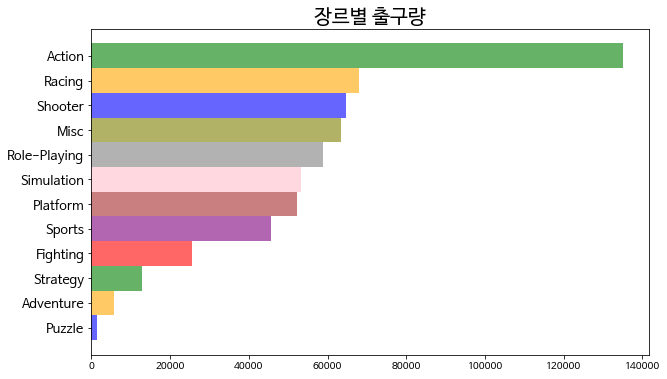

In [ ]:
label = genre_global.index
index = np.arange(len(label)) # 0 ~ 11

plt.figure(figsize=(10,6))
plt.barh(index, list(genre_global), color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'], alpha=0.6, height=1);
plt.yticks(index, label, fontsize=13);
plt.title('Ïû•Î•¥Î≥Ñ Ï∂úÍµ¨Îüâ', fontsize=20);

### `Genre`Î≥ÑÎ°ú Í∑∏Î£πÌôî ÌïòÏó¨ ÏßÄÏó≠Î≥Ñ Ï¥ù Ï∂úÍµ¨ÎüâÏùÑ ÌôïÏù∏

In [ ]:
genre_local = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genre_local

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action        71151.72  42709.42  11855.43      9283.08
Adventure      2801.52   1463.52    651.81       816.62
Fighting       8319.54  13998.51   1886.96      1436.01
Misc          37990.97  21606.01   2403.95      1372.51
Platform      33542.07  13099.34   2230.32      3451.11
Puzzle          821.51    550.42     56.24        12.44
Racing        55249.21   6534.39   2656.06      3476.17
Role-Playing  12417.55    483.06  38639.10      7356.00
Shooter       27071.83  33706.89    438.14      3501.52
Simulation    28878.56  11111.89  12562.29       731.25
Sports        30664.26   7670.24   2434.53      4831.88
Strategy       8267.01    844.74   1648.94      2211.01

### ÏàòÏßÅ ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî

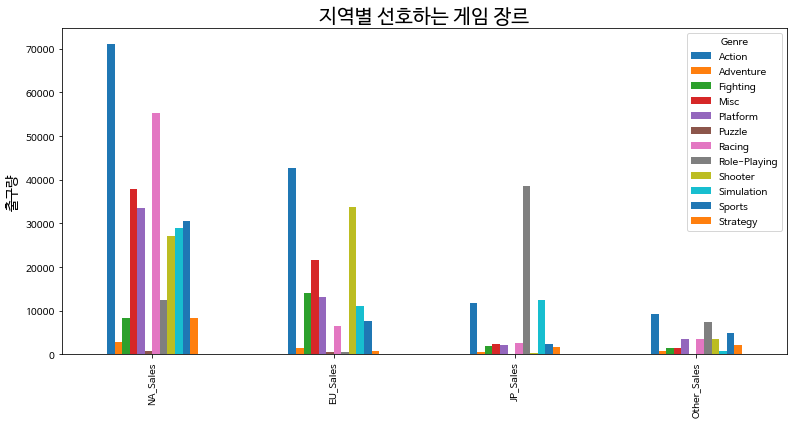

In [ ]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏßÄÏ†ï(ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
plt.rc('font', family='NanumBarunGothic')

genre_local.T.plot.bar(figsize=(13,6));
plt.title('ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥', fontsize=20)
plt.ylabel('Ï∂úÍµ¨Îüâ', fontsize=14);

### Î∂ÑÏÑù ÎÇ¥Ïö©
- Ï†Ñ ÏÑ∏Í≥ÑÏ†ÅÏúºÎ°ú Í∞ÄÏû• ÏûàÍ∏∞ÏûàÎäî Í≤åÏûÑ Ïû•Î•¥Îäî `Action`Ïù¥Îùº Ìï† Ïàò ÏûàÎã§. Î¨¥Î†§ ÎëêÎ≤àÏß∏Î°ú Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ `Racing`Ïùò Îëê Î∞∞Ïóê Îã¨ÌïúÎã§.
- ÌïòÏßÄÎßå ÏùºÎ≥∏ÏóêÏÑúÎßåÌÅºÏùÄ ÏïΩÏÑ∏Î•º Î≥¥Ïù¥Î©∞, ÏùºÎ≥∏ ÌïúÏ†ï `Role-Playing`Ïù¥ Í∞ïÏÑ∏Ïù¥Îã§.

# Ïó∞ÎèÑ Ìè¨Ìï® ÏÑ∏Î∂ÑÌôî Í≥ºÏ†ï
1. Line Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
2. Î∂ÑÏÑù ÎÇ¥Ïö©

In [ ]:
# Í∑∏Î£πÌôî
genre_year = df.groupby(['Year', 'Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'].sum().reset_index()

genre_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Year     Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales    Total
0  1980    Action      0.32      0.02       0.0         0.00     0.34
1  1980  Fighting      0.72      0.04       0.0         0.01     0.77
2  1980      Misc      2.53      0.15       0.0         0.02     2.70
3  1980   Shooter      6.56      0.43       0.0         0.08     7.07
4  1981    Action     13.86   1100.70       0.0         0.12  1114.68

### Line Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî

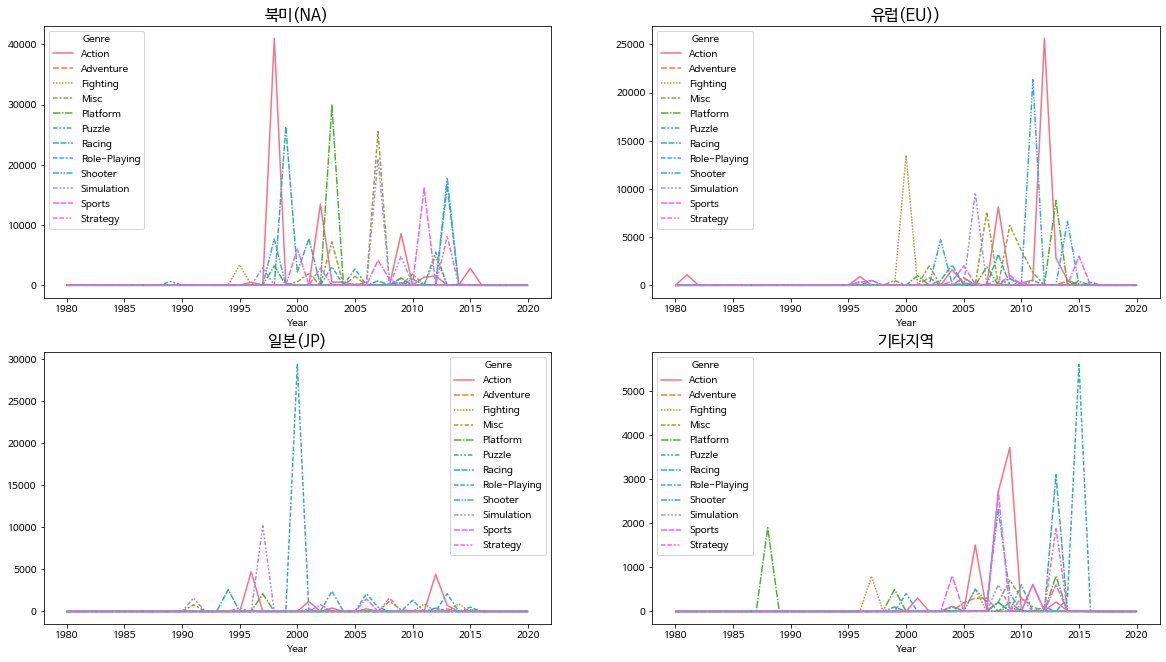

In [ ]:
# pivot tableÎ°ú Î≥ÄÍ≤Ω
genre_NA = genre_year.pivot(index='Year', columns='Genre', values='NA_Sales').fillna(0)
genre_EU = genre_year.pivot(index='Year', columns='Genre', values='EU_Sales').fillna(0)
genre_JP = genre_year.pivot(index='Year', columns='Genre', values='JP_Sales').fillna(0)
genre_OTH = genre_year.pivot(index='Year', columns='Genre', values='Other_Sales').fillna(0)

plt.figure(figsize=(20, 11))

plt.subplot(2, 2, 1)
sns.lineplot(data=genre_NA)
plt.title('Î∂ÅÎØ∏(NA)', fontsize=16)

plt.subplot(2, 2, 2)
sns.lineplot(data=genre_EU)
plt.title('Ïú†ÎüΩ(EU))', fontsize=16)

plt.subplot(2, 2, 3)
sns.lineplot(data=genre_JP)
plt.title('ÏùºÎ≥∏(JP)', fontsize=16)

plt.subplot(2, 2, 4)
sns.lineplot(data=genre_OTH)
plt.title('Í∏∞ÌÉÄÏßÄÏó≠', fontsize=16);

### Î∂ÑÏÑù ÎÇ¥Ïö©
- Î∂ÅÎØ∏(NA)Ïùò Í≤åÏûÑ Ïû•Î•¥Îäî `Action`Ïù¥ Í∞ÄÏû• Ïö∞ÏÑ∏Ìï¥ Î≥¥ÏòÄÏßÄÎßå Ïó∞ÎèÑÎ≥Ñ Ï∞®Ìä∏Î•º Î¥§ÏùÑ Îïå, `Racing`Ïù¥ ÏµúÍ∑º Ìä∏Î†åÎìúÏóê Îçî Ï†ÅÌï©Ìïú Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
- Ïú†ÎüΩ(EU)Ïùò ÏµúÍ∑º Ìä∏Î†åÎìúÎäî `Action`Í≥º `Shooter`Í≤åÏûÑÏù¥Îã§.
- ÏùºÎ≥∏ÏùÄ `Role_Playing`Ïù¥ Í∞ÄÏû• Ïù∏Í∏∞Í∞Ä ÎßéÏïòÏßÄÎßå ÏòàÏ†ÑÎßåÌïòÏßÄ Î™ªÌïòÍ≥†, Í∏ÄÎ°úÎ≤å ÌùêÎ¶ÑÏóê Îî∞Îùº `Action`ÎèÑ ÏàòÏöîÍ∞Ä ÎßéÎã§.
- Í∑∏ Ïô∏ Í∏∞ÌÉÄÏßÄÏó≠ÏóêÏÑúÎäî `Role-Playing`Ïù¥ ÎåÄÏÑ∏ Í≤åÏûÑ Ïû•Î•¥Îùº Î≥º Ïàò ÏûàÎã§.

# Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑ Ìä∏Î†åÎìú
1. `genre_year`ÏùÑ 10ÎÖÑ Îã®ÏúÑÎ°ú ÎÇòÎàÑÍ∏∞
2. Ï∞®Ìä∏Ïùò Îß§Í∞úÎ≥ÄÏàòÏóê ÎÜìÏùº Ìï®Ïàò ÎßåÎì§Í∏∞
3. Pie Ï∞®Ìä∏Î°ú Ìä∏Î†åÎìú Î∂ÑÏÑù(10ÎÖÑ Ï£ºÍ∏∞)
4. Î∂ÑÏÑù ÎÇ¥Ïö©

### `genre_year`ÏùÑ 10ÎÖÑ Îã®ÏúÑÎ°ú ÎÇòÎàÑÍ∏∞
- 2020ÎÖÑÎèÑ Îç∞Ïù¥ÌÑ∞Îäî 2010ÎÖÑÎåÄÎ°ú Ìè¨Ìï®

In [ ]:
genre_year_ten = genre_year.copy()

for i in range(10):
  genre_year_ten['Year'].replace(1980+i, '80', inplace=True)
  genre_year_ten['Year'].replace(1990+i, '90', inplace=True)
  genre_year_ten['Year'].replace(2000+i, '00', inplace=True)
  genre_year_ten['Year'].replace(2010+i, '10', inplace=True)

genre_year_ten['Year'].replace(2020, '10', inplace=True)

# 1ÎÖÑ Îã®ÏúÑÎ°ú Í∑∏Î£πÌôîÎêú Í≤ÉÏùÑ 10ÎÖÑ Îã®ÏúÑÎ°ú Îã§Ïãú Í∑∏Î£πÌôî ÌïúÎã§.
genre_year_sum = genre_year_ten.groupby(['Year', 'Genre'])['Total'].sum().reset_index()
# ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú pivot tableÎ°ú Î∞îÍøîÏ§ÄÎã§.
gys_pivot = genre_year_sum.pivot(index='Year', columns='Genre', values='Total').fillna(0)
# Ïù∏Îç±Ïä§ Ïû¨Î∞∞Ïó¥
gys_pivot = gys_pivot.reindex(['80', '90', '00', '10'])
gys_pivot

Genre    Action  Adventure  Fighting      Misc  Platform  Puzzle    Racing  \
Year                                                                         
80      1150.99       4.78      7.24      8.44   2022.07  662.69     12.10   
90     47534.41      44.80   4323.09   1563.28   6008.29   38.94  29645.86   
00     44548.76    4523.15  14329.85  54473.13  34172.75  217.85  18436.20   
10     41765.49    1160.74   6980.84   7328.59  10119.73  521.13  19821.67   

Genre  Role-Playing   Shooter  Simulation    Sports  Strategy  
Year                                                           
80            15.25     59.77        0.51     31.78      0.00  
90           182.77   7768.12    15550.49    946.39     57.51  
00         41908.05   9332.56    37361.93  23900.50   2379.59  
10         16789.64  47557.93      371.06  20722.24  10534.60

### Ï∞®Ìä∏Ïùò Îß§Í∞úÎ≥ÄÏàòÏóê ÎÜìÏùº Ìï®Ïàò ÎßåÎì§Í∏∞
- Ìï®ÏàòÏùò Îß§Í∞úÎ≥ÄÏàò `data`Îäî Îç∞Ïù¥ÌÑ∞Ïùò Ìñâ ÌïúÏ§ÑÏî©ÏúºÎ°ú Ìï† Í≤ÉÏûÑ.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ëÏù¥ 5% ÎØ∏ÎßåÏù¥Î©¥ Í∏∞ÌÉÄÌï≠Î™© `ETC`Î°ú Î∂ÑÎ•òÌïúÎã§.
- ÎπÑÏ§ëÏù¥ 5% Ïù¥ÏÉÅÏù∏ Ìï≠Î™©Îì§Îßå Íµ¨ÏÑ±ÌïòÏó¨ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏãúÎ¶¨Ï¶à ÌòïÌÉúÎ°ú Î∞òÌôòÌïúÎã§.

In [ ]:
def ratio_table(data):
  etc = 0
  new_dict = dict()
  for (i, e) in enumerate(data):
    ratio = e / data.sum()
    if ratio < 0.05:
      etc += e
    else:
      # ÎπÑÏ§ëÏù¥ 5%Í∞Ä ÎÑòÎäî Ìï≠Î™©Îì§Îßå Ìè¨Ìï®
      new_dict[data.index[i]] = e
  # 5% ÎØ∏ÎßåÏù∏ Í≤ÉÎì§ÏùÑ Ìï©Ï≥êÏÑú Í∏∞ÌÉÄÌï≠Î™©ÏúºÎ°ú Íµ¨ÏÑ±
  new_dict['ETC'] = etc
  return pd.Series(new_dict)

### Pie Ï∞®Ìä∏Î°ú Ìä∏Î†åÎìú Î∂ÑÏÑù(10ÎÖÑ Ï£ºÍ∏∞)




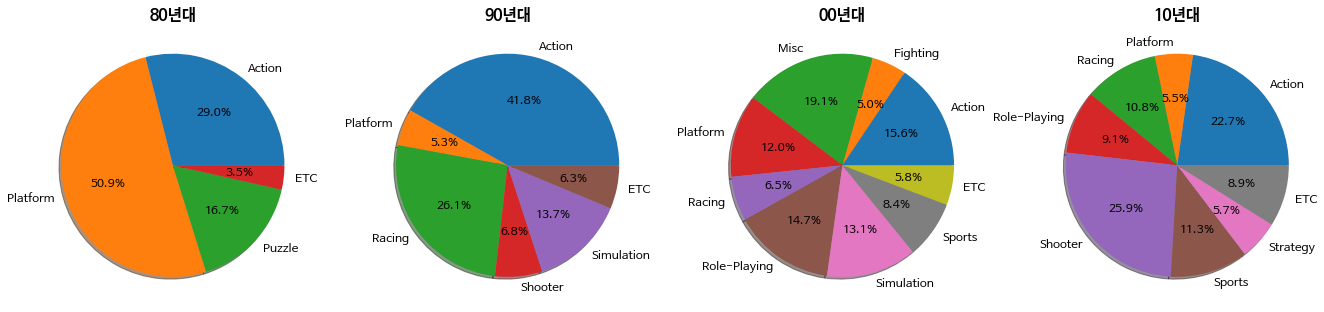

In [ ]:
plt.figure(figsize=(23, 14))

for e in range(4):
  plt.subplot(1, 4, e+1)
  ratio = ratio_table(gys_pivot.iloc[e])
  textprops = dict(size=12, weight=3)
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gys_pivot.index[e]}ÎÖÑÎåÄ', fontsize=16, fontweight='bold')

### Î∂ÑÏÑù ÎÇ¥Ïö©
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÜìÍ≥† Î≥¥Î©¥ `Action` Ïû•Î•¥Ïùò Í≤åÏûÑÏù¥ Í∏ÄÎ°úÎ≤å Ìä∏Î†åÎìúÎùº Î≥º Ïàò ÏûàÏóàÏßÄÎßå, 10Ï£ºÍ∏∞Î°ú Î≥¥Î©¥ `Shooter`ÎèÑ ÎßåÎßåÏπò ÏïäÍ≤å ÏàòÏöîÍ∞Ä ÎÜíÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.
- Í≤åÏûÑ ÏÇ∞ÏóÖÏù¥ Î∞úÏ†ÑÌï®Ïóê Îî∞Îùº Îã§ÏñëÌïú Ïû•Î•¥Ïùò Í≤åÏûÑÏùÑ Ï¶êÍ∏∞Îäî Ïù¥Ïö©ÏûêÎì§Ïù¥ ÎßéÏïÑÏßÄÎäî Ï∂îÏÑ∏Ïù¥Îã§.

# ÌèâÍ∑†ÏúºÎ°ú Îã§Ïãú Î∂ÑÏÑùÌï¥Î≥¥Ïûê

In [ ]:
# ÌèâÍ∑†ÏúºÎ°ú Í∑∏Î£πÌôî
genre_year_mean = genre_year_ten.groupby(['Year', 'Genre'])['Total'].mean().reset_index()
gym_pivot = genre_year_mean.pivot(index='Year', columns='Genre', values='Total').fillna(0)
gym_pivot = gym_pivot.reindex(['80', '90', '00', '10'])
gym_pivot

Genre      Action   Adventure     Fighting         Misc     Platform  Puzzle  \
Year                                                                           
80      115.09900    2.390000     2.413333     1.688000   224.674444  94.670   
90     4753.44100    4.977778   480.343333   173.697778   600.829000   3.894   
00     4454.87600  452.315000  1432.985000  5447.313000  3417.275000  21.785   
10     5220.68625  165.820000   997.262857  1046.941429  1445.675714  86.855   

Genre       Racing  Role-Playing      Shooter  Simulation       Sports  \
Year                                                                     
80        2.420000        3.8125     5.977000      0.1700     3.531111   
90     2964.586000       18.2770   863.124444   1555.0490    94.639000   
00     1843.620000     4190.8050   933.256000   3736.1930  2390.050000   
10     2831.667143     2098.7050  6793.990000     46.3825  2960.320000   

Genre     Strategy  
Year                
80        0.000000  
90        6.390000  
00      237.959000  
10     1504.942857

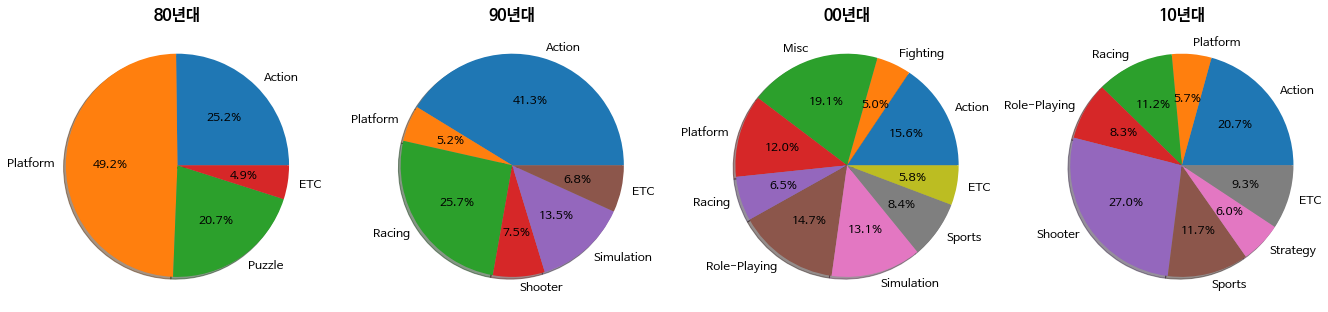

In [ ]:
plt.figure(figsize=(23, 14))

for e in range(4):
  plt.subplot(1, 4, e+1)
  ratio = ratio_table(gym_pivot.iloc[e])
  textprops = dict(size=12, weight=3)
  plt.pie(x=ratio, labels=ratio.index, autopct='%.1f%%', shadow=True, textprops=textprops);
  plt.title(f'{gym_pivot.index[e]}ÎÖÑÎåÄ', fontsize=16, fontweight='bold')

### `Action`Í≥º `Shooter`Ïùò Ï∞®Ïù¥Îäî Ïú†ÏùòÎØ∏ÌïúÍ∞Ä?
- Í∑ÄÎ¨¥Í∞ÄÏÑ§($H_0$): $ \mu_{shooter} \leq \mu_{action} $
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§($H_a$): $ \mu_{shooter} > \mu_{action} $

In [ ]:
action = df.query('Year >= 2010')[df.Genre=='Action']['Total'].reset_index(drop=True)
shooter = df.query('Year >= 2010')[df.Genre=='Shooter']['Total'].reset_index(drop=True)

tt = stats.ttest_ind(a=shooter, b=action, alternative='greater')
print('P-value:', round(tt.pvalue, 3))

P-value: 0.038


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Î∂ÑÏÑù ÎÇ¥Ïö©
- 10ÎÖÑÎåÄ ÌååÏù¥ Ï∞®Ìä∏Î•º Ï£ºÎ™©Ìï¥Î≥¥Î©¥ Ï∂úÍµ¨ÎüâÏùò Ìï©Í≥ÑÏùº Í≤ΩÏö∞Ïùò Ï∞®Ìä∏ÏôÄ ÎπÑÍµêÌñàÏùÑ Îïå, `Action`Í≥º `Shooter`Ïùò Ï∞®Ïù¥Í∞Ä Îçî Î≤åÏñ¥Ï°åÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.
- pÍ∞íÏù¥ 0.05Î≥¥Îã§ ÏûëÏïÑ Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§. Ï¶â `shooter`Ïùò Ï∂úÍ≥†Îüâ ÌèâÍ∑†ÏùÄ `action`Ïùò Ï∂úÍ≥†Îüâ ÌèâÍ∑†Î≥¥Îã§ Ïú†ÏùòÎØ∏ÌïòÍ≤å ÌÅ¨Îã§Í≥† Î≥º Ïàò ÏûàÎã§.
- Ïù¥Îäî Í≥ß `Action`Ïû•Î•¥Ïùò Í≥µÍ∏âÎüâÏù¥ Ï∂úÍ≥†ÎüâÏóê ÎπÑÌï¥ ÎßéÎã§Îäî ÏùòÎØ∏Ïù¥Î©∞, ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÎÜíÏùÄ Ï∂úÍ≥†ÎüâÏùÑ Í∏∞Î°ùÌïú `Shooter`Í∞Ä ÏãúÏû• ÏßÑÏ∂úÏóê Îçî Ïú†Î¶¨Ìï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.